In [1]:
from util import *
from swarm import *
from metrics import *
import random
import time
from IPython import display
import pylab as pl

In [2]:
conciliation_quota  = 0.5

critical_amount     = 100

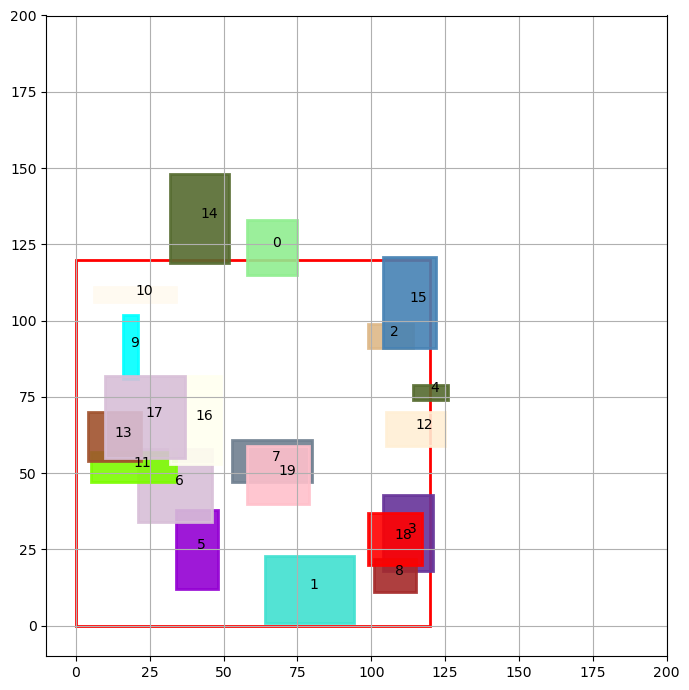

In [3]:
layout_zone = {"xmin"   : 0,
               "ymin"   : 0,
               "width"  : 120,
               "height" : 120}

participants       = generate_unconnected_participants(20, layout_zone, 30, 30, 666)

a = plot_participants(layout_zone, participants, 200, 200)


In [4]:
participants            = determine_initial_conditions(participants, layout_zone, conciliation_quota, critical_amount)

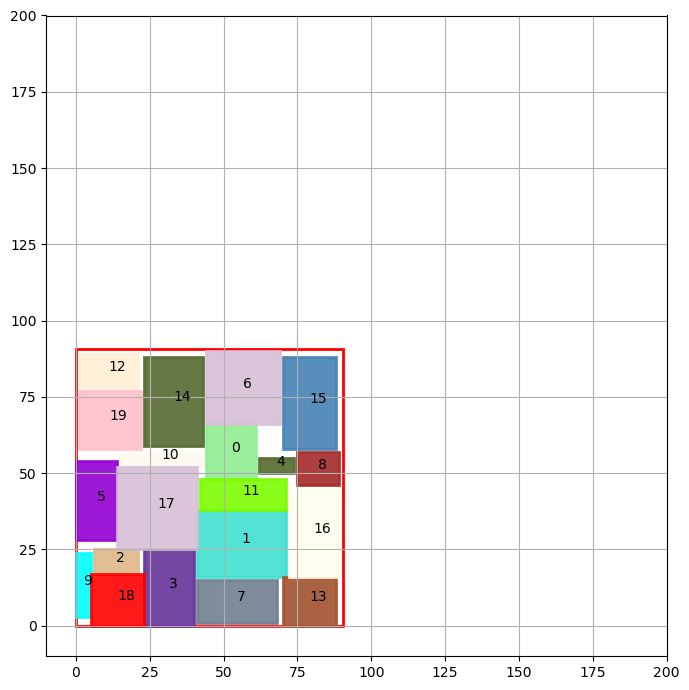

In [5]:
id_list = [p['idx'] for p in (participants.values())]

for i in range(1000): # maximum rounds of interaction

    participants    = one_round_of_interaction(participants, layout_zone, 'interference', conciliation_quota, critical_amount)

    plot_participants(layout_zone, participants, 200, 200)

    last_moves = {key : value['last-move'] for key,value in participants.items()}

    moves = list(last_moves.values())

    #print(participants['0']['interference'])
    #print(participants['0']['relaxed-connections'])
    #print(last_moves)

    if moves.count('linger') == len(participants):

        layout_zone         = scale_layout_zone(layout_zone, 0.99)

        for idx in id_list:

            participants[idx]['aversions'] = {}
            participants[idx]['clashes'] = {}
        

        if layout_zone['width'] < 90:
            break


In [6]:
print(len(participants['0']['overlap-with-idx']))

0


In [7]:
ds = calculate_dead_space(participants, layout_zone)

print("Dead Space: " + str(ds) + " %")

Dead Space: 10.971872630194142 %
